In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("cleaned_cupid.csv",index_col=0)

In [3]:
df['height'] = df['height'].replace('unspecified', pd.NA)
# Convert height to numeric, errors='coerce' will turn any non-numeric values into NaN
df['height'] = pd.to_numeric(df['height'], errors='coerce')

# Calculate median height excluding NaN
median_height = df['height'].median()

# Impute "unspecified" (now NaN) with the median height
df['height'].fillna(median_height, inplace=True)

In [4]:
cols = list(df.columns)
cols.remove("age")
cols.remove("height")
cols

['status',
 'sex',
 'orientation',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'income',
 'job',
 'offspring',
 'pets',
 'religion',
 'smokes',
 'speaks',
 'preference']

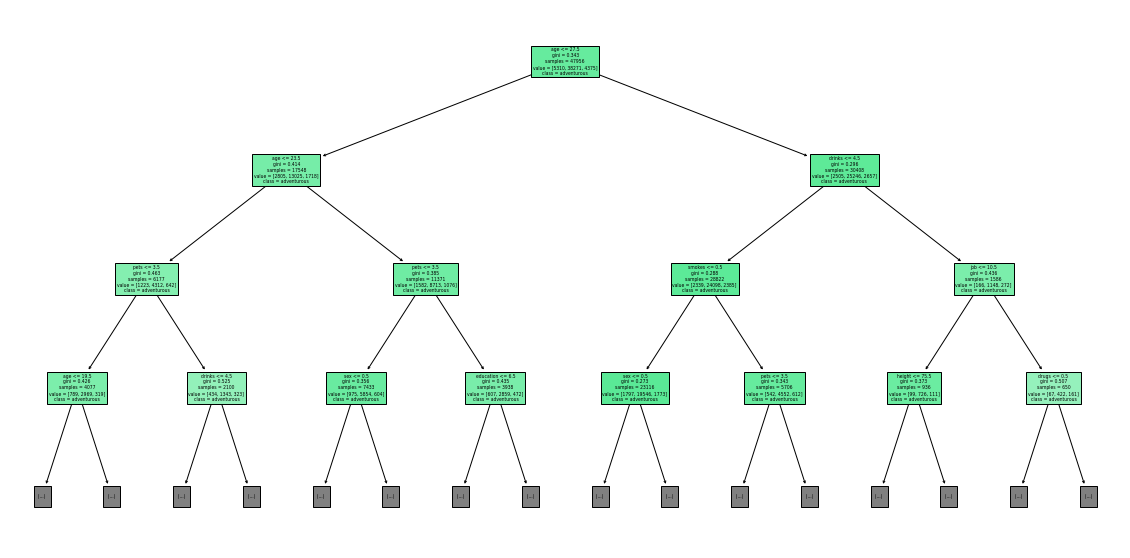

In [5]:
# Drop the first unnamed column as it seems to be an index
# df = df.drop(columns=["Unnamed: 0"])

# Handle missing values by dropping them for simplicity (alternative approaches could involve imputation)
df_clean = df

# Encoding categorical variables
label_encoders = {}
for column in cols:
    if df_clean[column].dtype == object and column != 'preference':
        le = LabelEncoder()
        df_clean[column] = le.fit_transform(df_clean[column])
        label_encoders[column] = le

# Splitting data into independent (X) and dependent (y) variables
X = df_clean.drop('preference', axis=1)
y = df_clean['preference']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=3)
plt.show()

In [6]:
clf.feature_importances_

array([0.12624535, 0.01621108, 0.00551895, 0.0210862 , 0.06569673,
       0.04781624, 0.0463112 , 0.03721922, 0.06130667, 0.06493716,
       0.13539931, 0.02964609, 0.08713839, 0.05356694, 0.03896649,
       0.06549476, 0.03288658, 0.06455264])

In [7]:
X.columns


Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'offspring', 'pets', 'religion', 'smokes', 'speaks'],
      dtype='object')

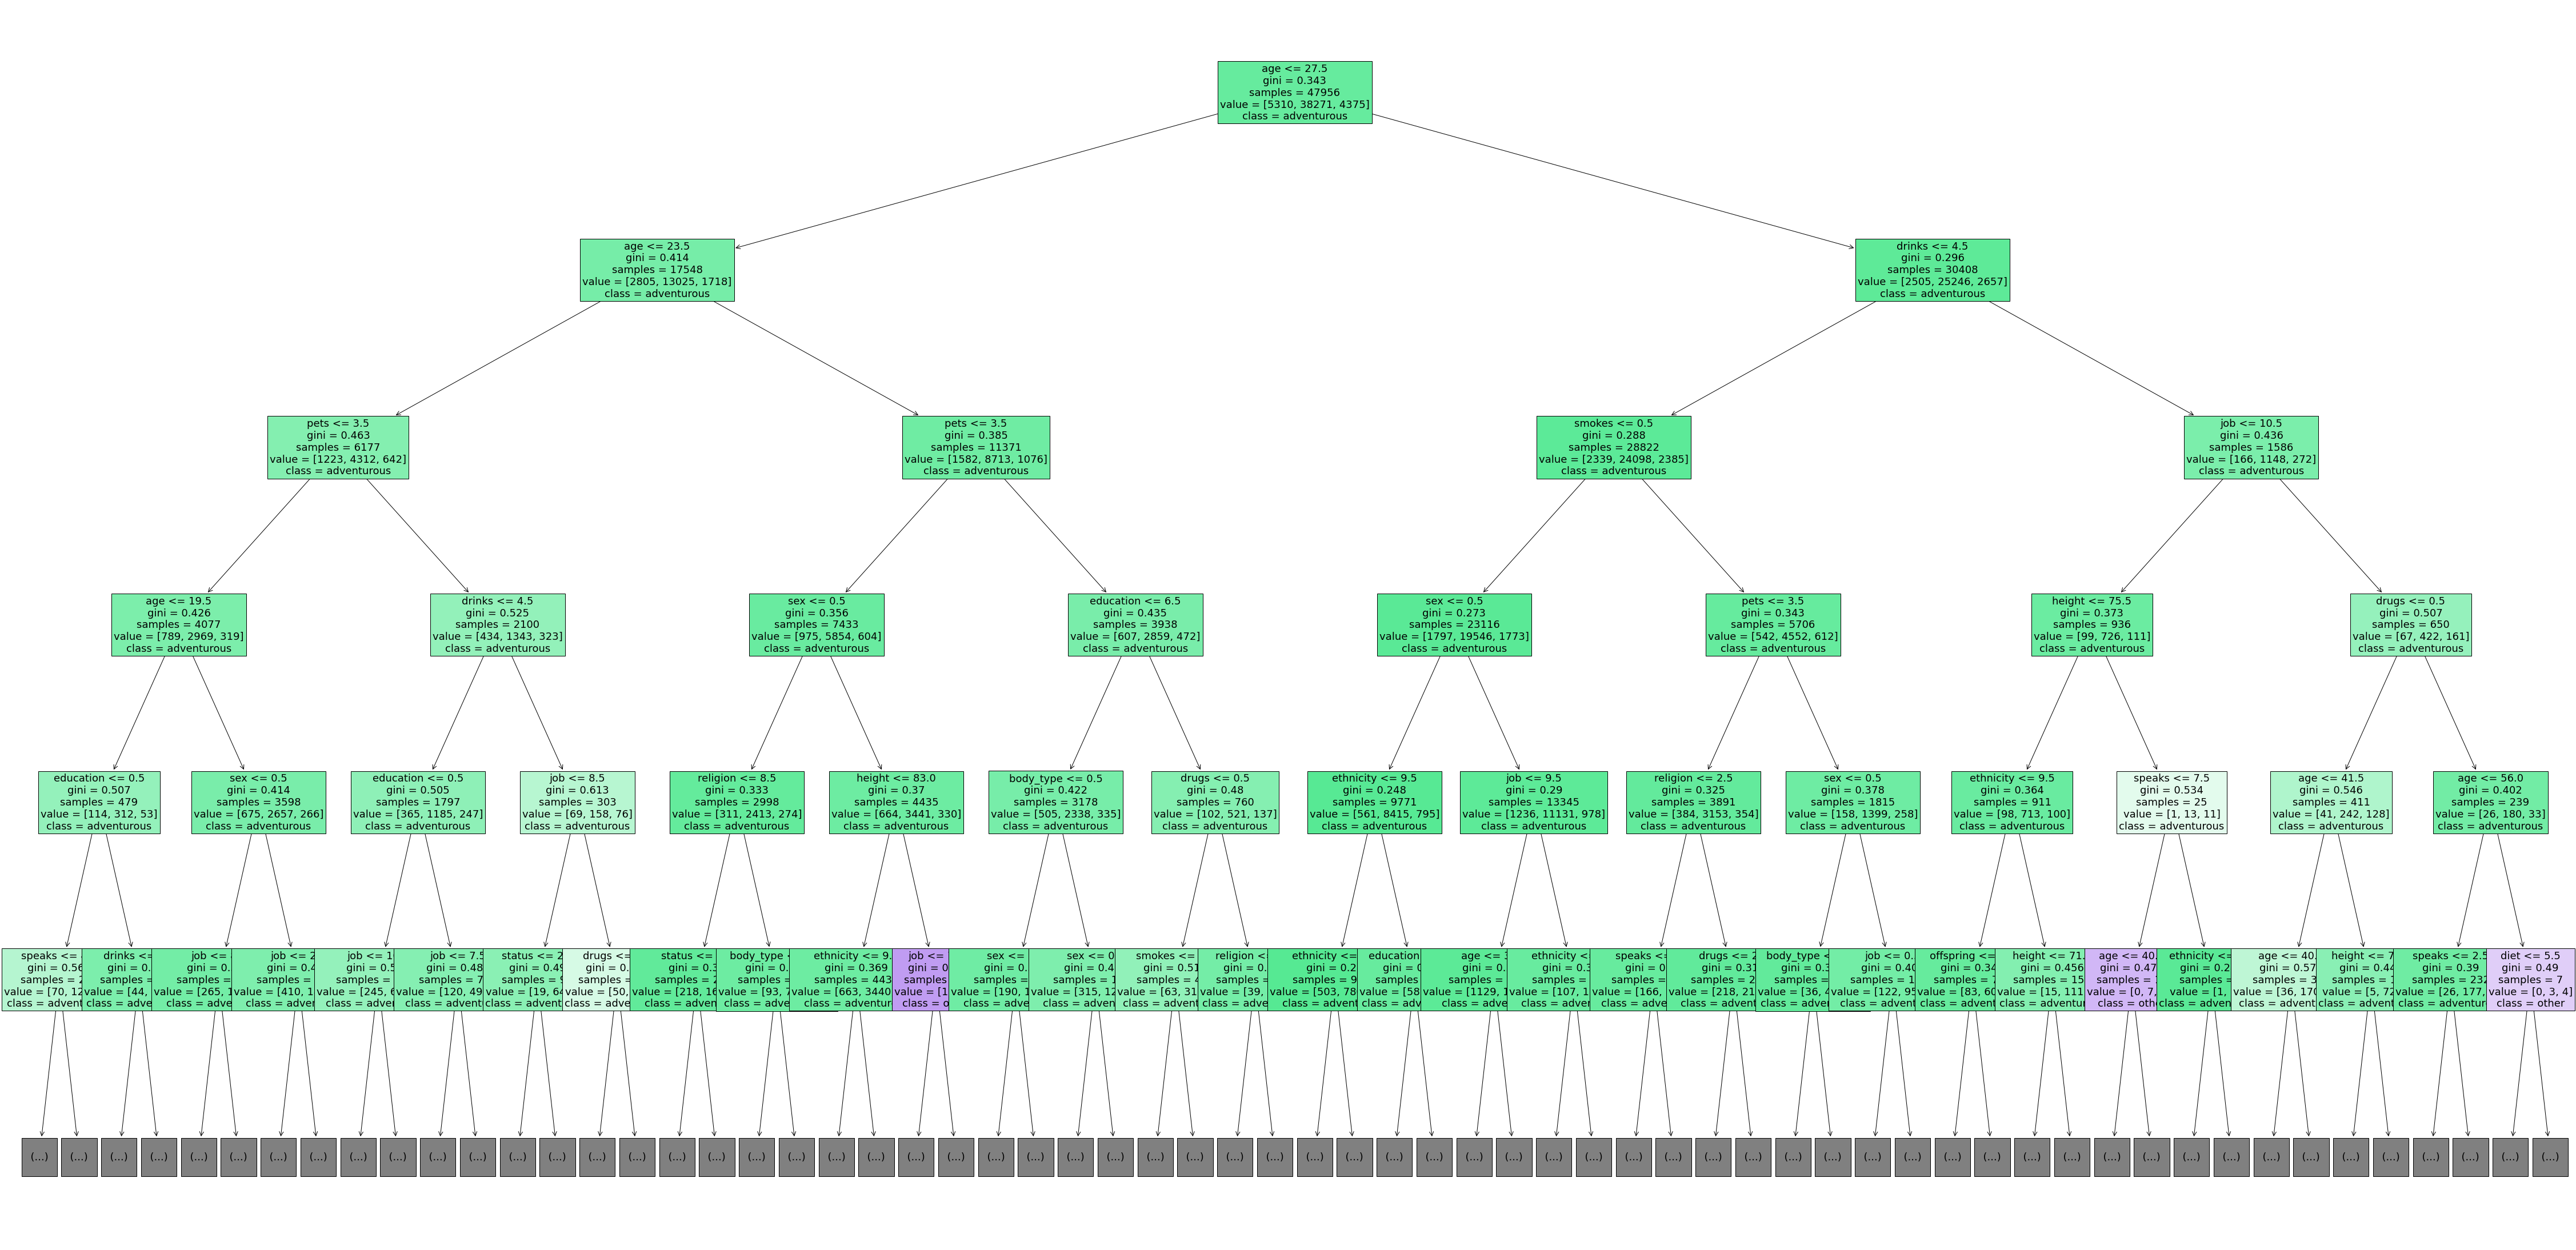

In [8]:
# Plotting the Decision Tree
plt.figure(figsize=(80,40))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=5,fontsize=18)
plt.show()

In [9]:
import numpy as np
np.average(clf.predict(X_test) == y_test)

0.6387823185988324

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,clf.predict(X_test))

array([[ 209,  994,  148],
       [1181, 7304, 1041],
       [ 149,  818,  146]], dtype=int64)

In [11]:
df["preference"].value_counts()

adventurous    47797
academic        6661
other           5488
Name: preference, dtype: int64

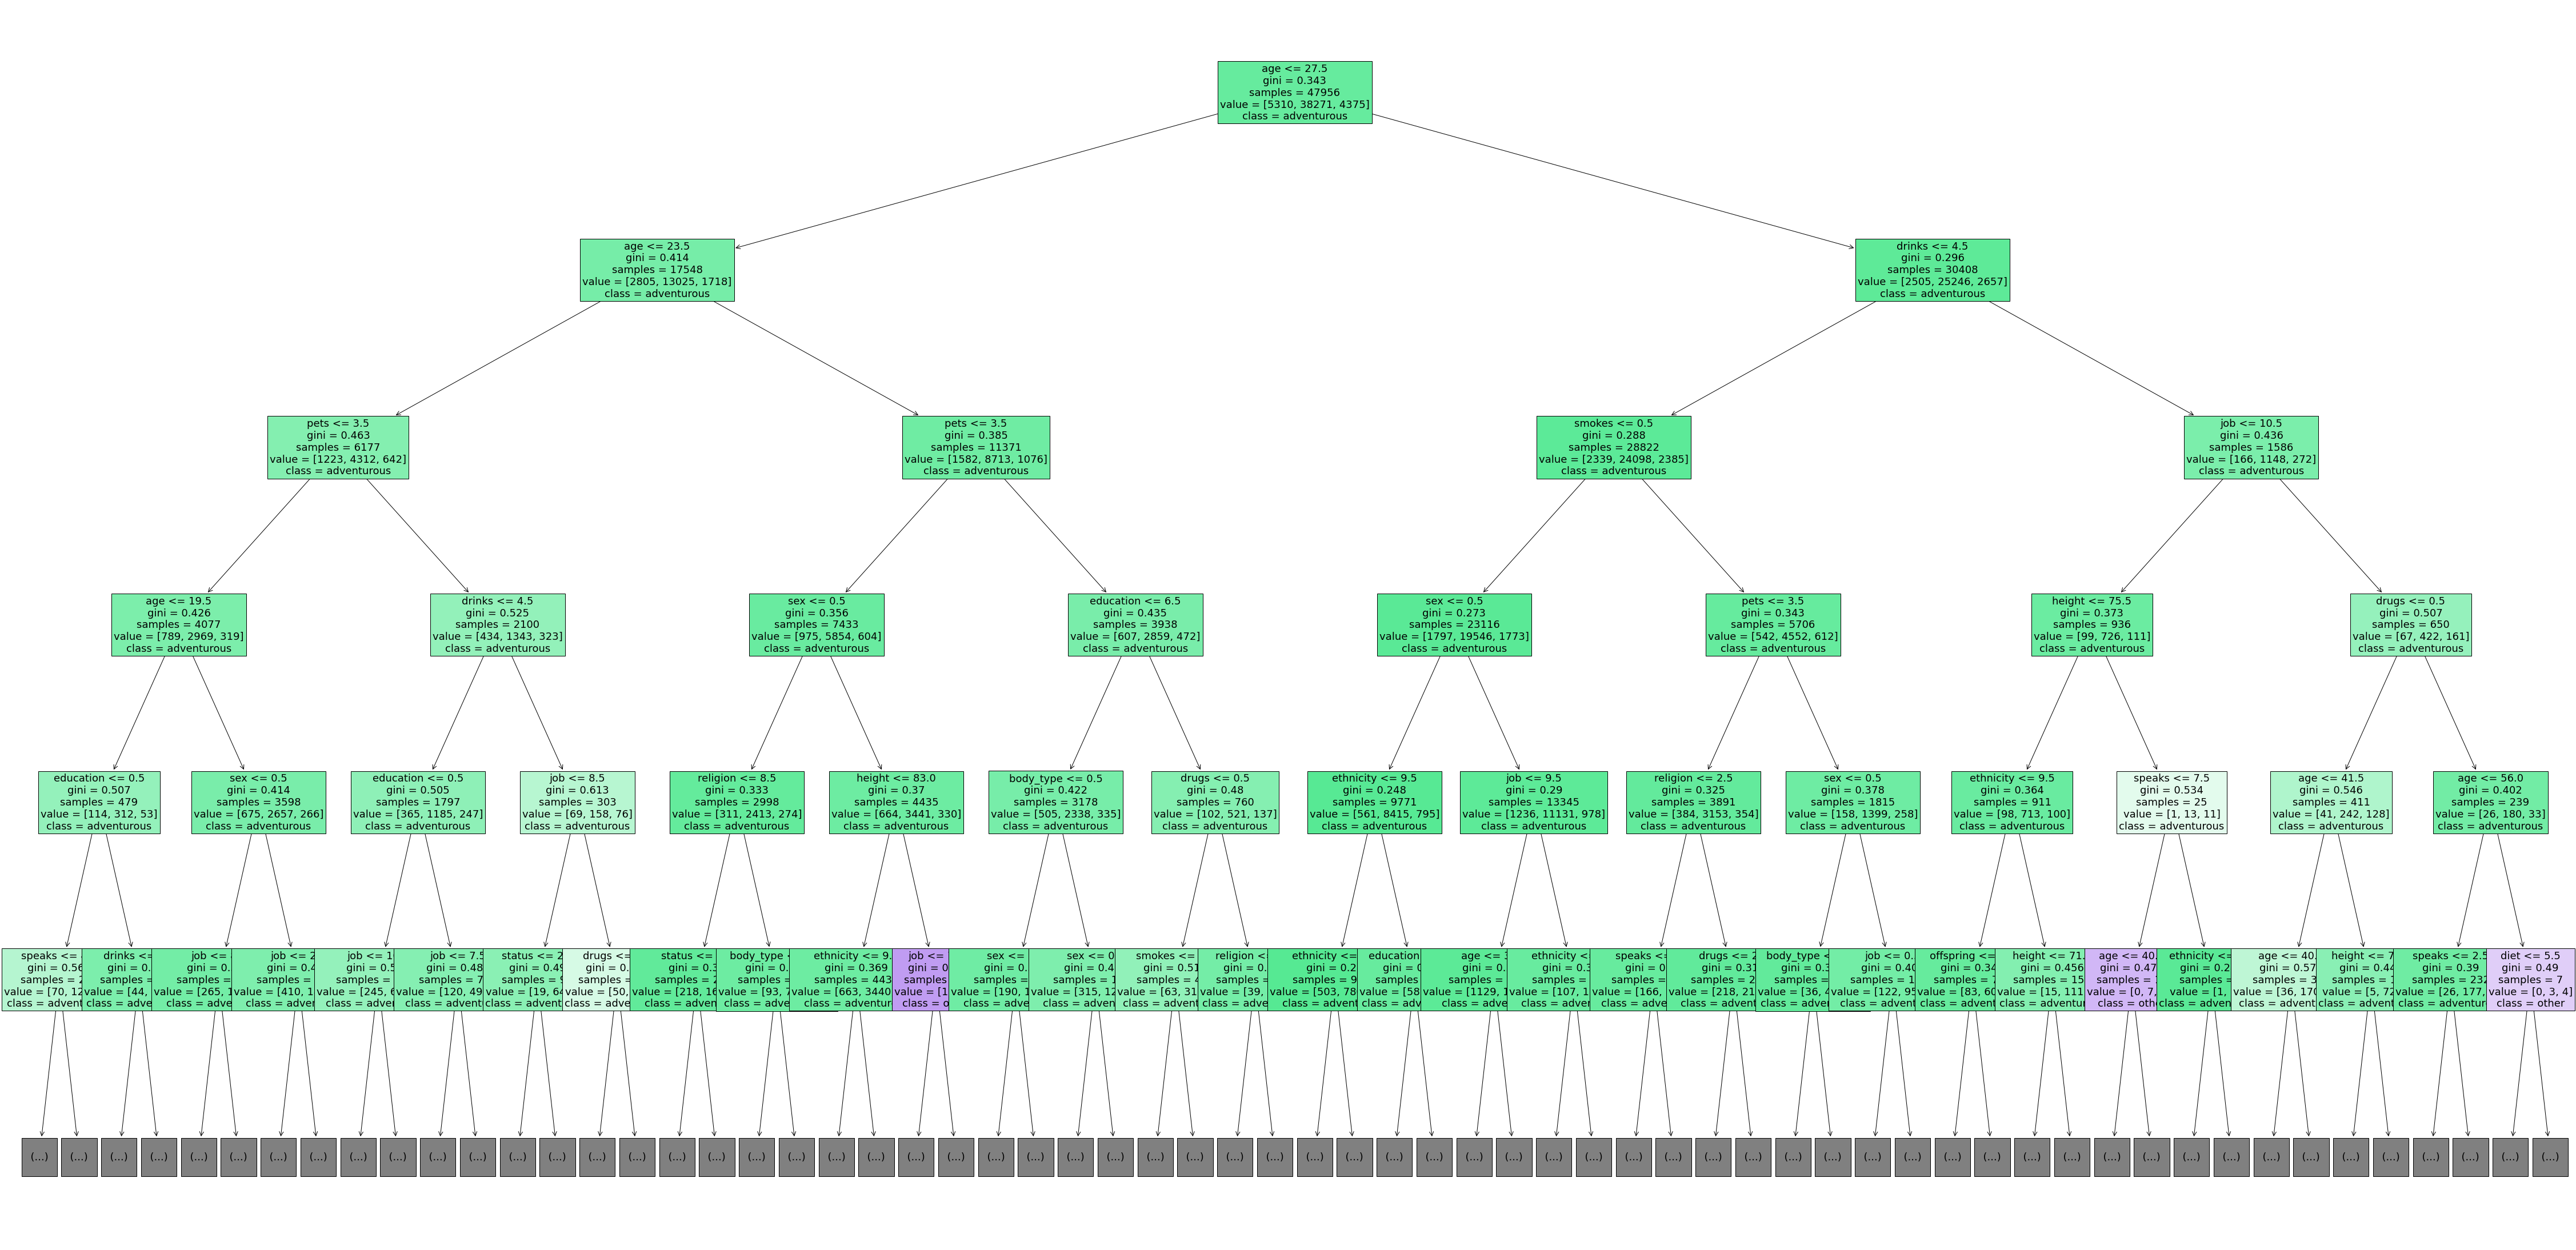

In [12]:
# Plotting the Decision Tree
plt.figure(figsize=(80,40))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=5,fontsize=18)
plt.show()

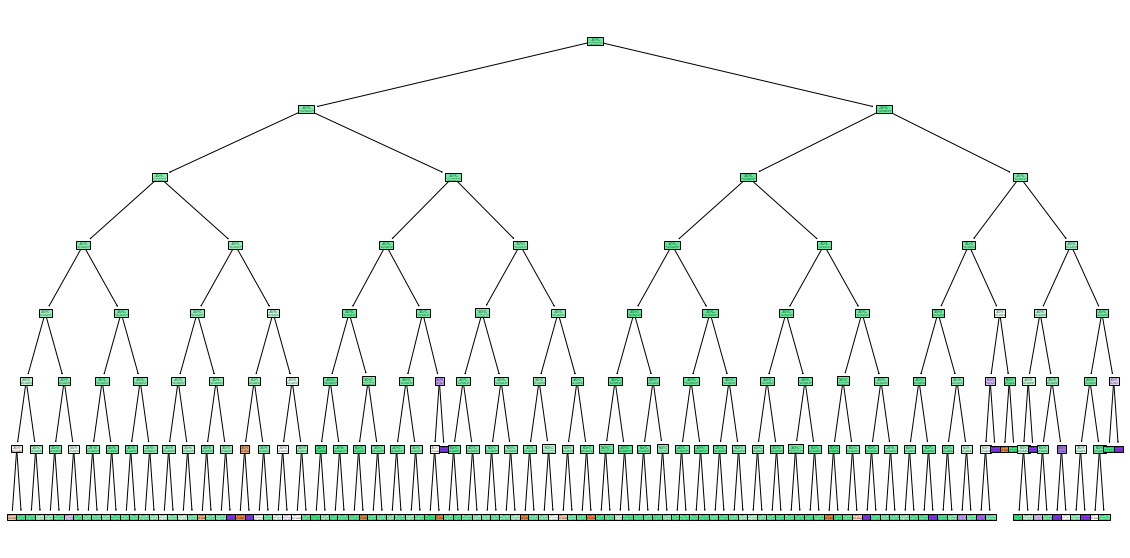

In [13]:
# Training the Decision Tree Classifier
clf2 = DecisionTreeClassifier(random_state=42,max_depth=7)
clf2.fit(X_train, y_train)

# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf2, filled=True, feature_names=X.columns, class_names=clf2.classes_, max_depth=7)
plt.show()

In [14]:
np.average(y_test==clf2.predict(X_test))


0.7930775646371977

In [15]:
np.average(y_train==clf2.predict(X_train))


0.7995454166319126

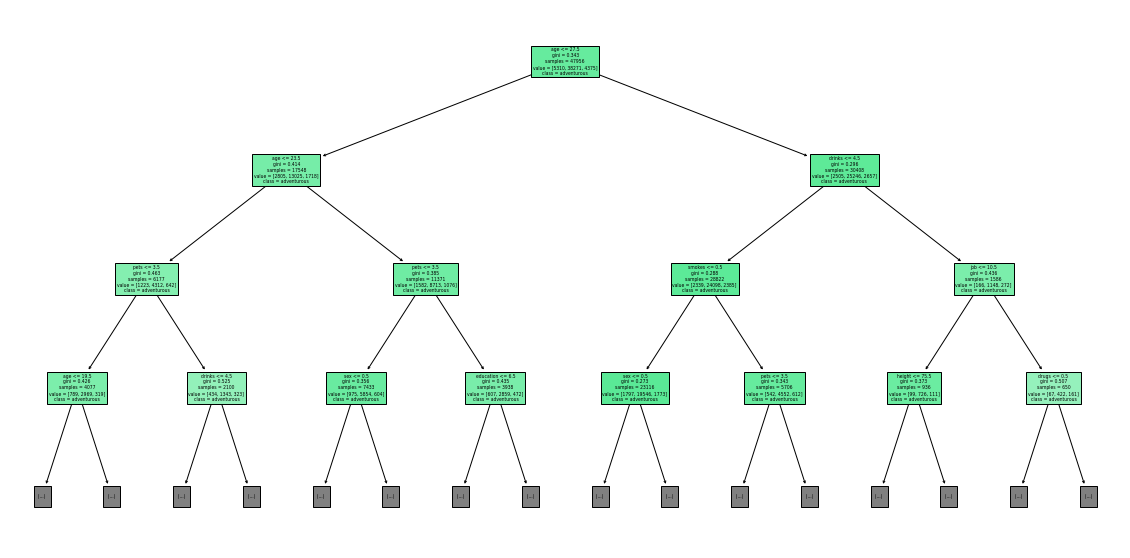

In [16]:
# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf2, filled=True, feature_names=X.columns, class_names=clf2.classes_, max_depth=3)
plt.show()

In [17]:
clf2.feature_importances_


array([0.3452252 , 0.01463889, 0.04628781, 0.00779259, 0.03512821,
       0.01307496, 0.08017546, 0.04840698, 0.03616668, 0.05650008,
       0.0492241 , 0.00851291, 0.08039335, 0.01795592, 0.06651878,
       0.01823634, 0.04085736, 0.03490437])

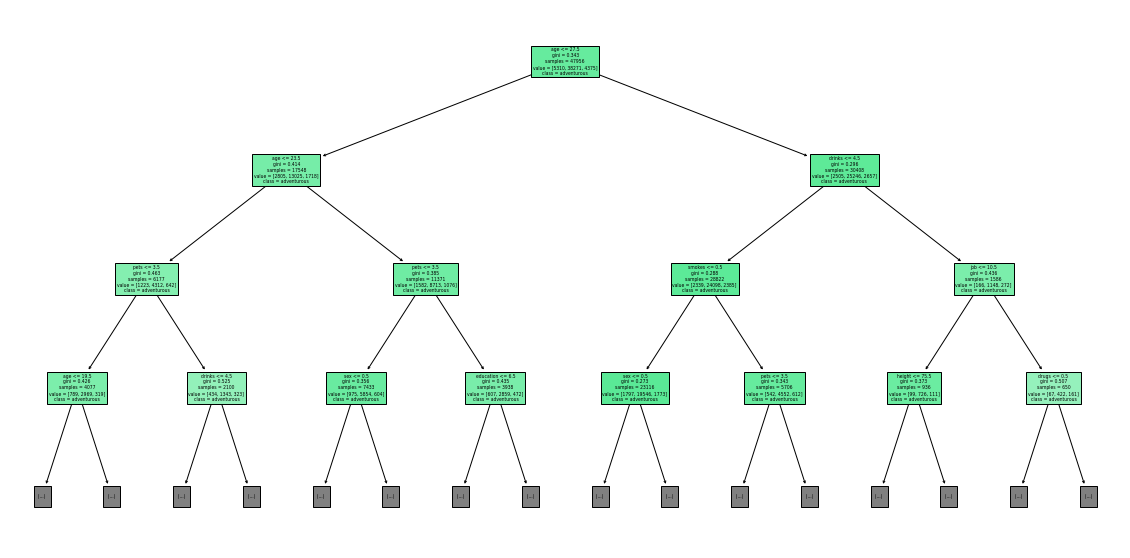

Accuracy: 0.6387823185988324


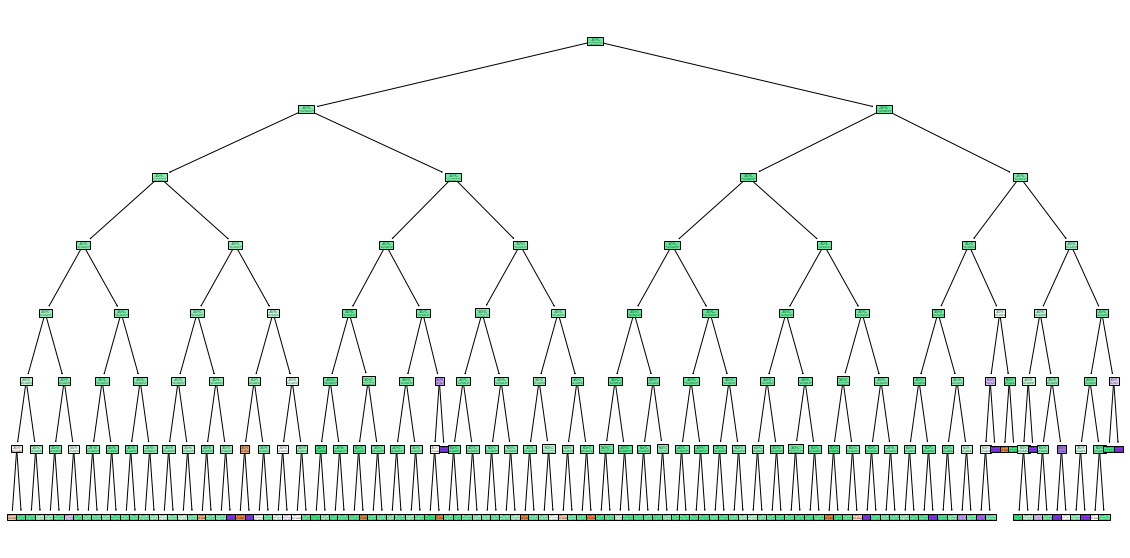

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("cleaned_cupid.csv", index_col=0)
df['height'] = pd.to_numeric(df['height'].replace('unspecified', pd.NA), errors='coerce').fillna(df['height'].median())

cols = [col for col in df.columns if col not in ["age", "height"]]
df_clean = df.copy()
label_encoders = {col: LabelEncoder().fit(df_clean[col]) for col in cols if df_clean[col].dtype == object and col != 'preference'}
for col, le in label_encoders.items():
    df_clean[col] = le.transform(df_clean[col])

X_train, X_test, y_train, y_test = train_test_split(df_clean.drop('preference', axis=1), df_clean['preference'], test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=clf.classes_, max_depth=3)
plt.show()

print(f"Accuracy: {clf.score(X_test, y_test)}")

plt.figure(figsize=(20, 10))
plot_tree(DecisionTreeClassifier(random_state=42, max_depth=7).fit(X_train, y_train), filled=True, feature_names=X_train.columns, class_names=clf.classes_, max_depth=7)
plt.show()


In [19]:
import lime
import lime.lime_tabular
predict_fn = lambda x: clf.predict_proba(x).astype(float)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=clf.classes_, discretize_continuous=True)
instance_to_explain = X_test.iloc[0]
exp = explainer.explain_instance(instance_to_explain.values, predict_fn, num_features=len(X.columns))
exp.show_in_notebook(show_table=True)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.metrics import confusion_matrix
import lime
import lime.lime_tabular

df = pd.read_csv("cleaned_cupid.csv", index_col=0)

df['height'] = df['height'].replace('unspecified', pd.NA)
df['height'] = pd.to_numeric(df['height'], errors='coerce')
median_height = df['height'].median()
df['height'].fillna(median_height, inplace=True)

cols = list(df.columns)
cols.remove("age")
cols.remove("height")

df_clean = df

label_encoders = {}
for column in cols:
    if df_clean[column].dtype == object and column != 'preference':
        le = LabelEncoder()
        df_clean[column] = le.fit_transform(df_clean[column])
        label_encoders[column] = le

X = df_clean.drop('preference', axis=1)
y = df_clean['preference']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

predict_fn = lambda x: clf.predict_proba(x).astype(float)

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=clf.classes_, discretize_continuous=True)

instance_to_explain = X_test.iloc[0]

exp = explainer.explain_instance(instance_to_explain.values, predict_fn, num_features=len(X.columns))

exp.show_in_notebook(show_table=True)

#plt.figure(figsize=(20, 10))
#plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=3)
#plt.show()

print("Accuracy on test set:", np.average(clf.predict(X_test) == y_test))
print("Confusion matrix:")
print(confusion_matrix(y_test, clf.predict(X_test)))
print("Class distribution:")
print(df["preference"].value_counts())
print("Feature importances:", clf.feature_importances_)


Accuracy on test set: 0.6387823185988324
Confusion matrix:
[[ 209  994  148]
 [1181 7304 1041]
 [ 149  818  146]]
Class distribution:
adventurous    47797
academic        6661
other           5488
Name: preference, dtype: int64
Feature importances: [0.12624535 0.01621108 0.00551895 0.0210862  0.06569673 0.04781624
 0.0463112  0.03721922 0.06130667 0.06493716 0.13539931 0.02964609
 0.08713839 0.05356694 0.03896649 0.06549476 0.03288658 0.06455264]


# shap

 99%|===================| 35616/35970 [00:36<00:00]        

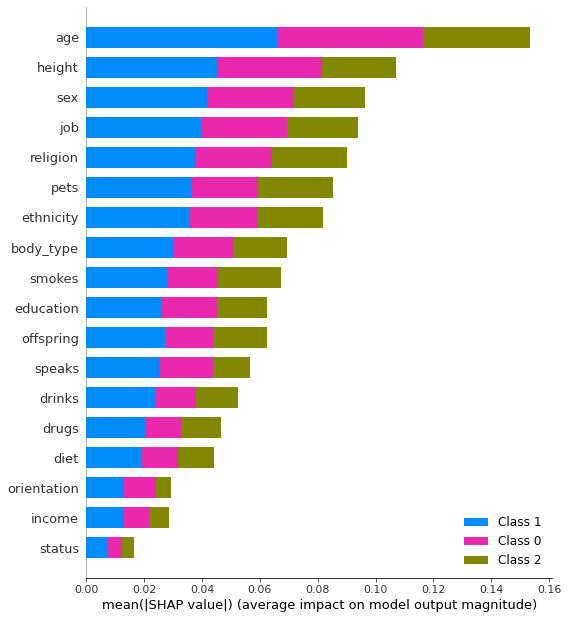

 99%|===================| 35602/35970 [00:36<00:00]        

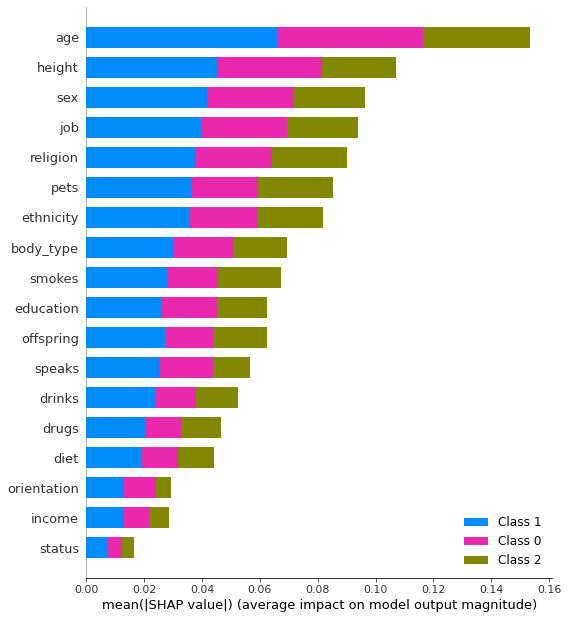

Accuracy on test set: 0.6387823185988324
Confusion matrix:
[[ 209  994  148]
 [1181 7304 1041]
 [ 149  818  146]]
Class distribution:
adventurous    47797
academic        6661
other           5488
Name: preference, dtype: int64
Feature importances: [0.12624535 0.01621108 0.00551895 0.0210862  0.06569673 0.04781624
 0.0463112  0.03721922 0.06130667 0.06493716 0.13539931 0.02964609
 0.08713839 0.05356694 0.03896649 0.06549476 0.03288658 0.06455264]


In [21]:
import shap
explainer = shap.Explainer(clf, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.metrics import confusion_matrix
import shap

df = pd.read_csv("cleaned_cupid.csv", index_col=0)

df['height'] = df['height'].replace('unspecified', pd.NA)
df['height'] = pd.to_numeric(df['height'], errors='coerce')
median_height = df['height'].median()
df['height'].fillna(median_height, inplace=True)

cols = list(df.columns)
cols.remove("age")
cols.remove("height")

df_clean = df

label_encoders = {}
for column in cols:
    if df_clean[column].dtype == object and column != 'preference':
        le = LabelEncoder()
        df_clean[column] = le.fit_transform(df_clean[column])
        label_encoders[column] = le

X = df_clean.drop('preference', axis=1)
y = df_clean['preference']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

explainer = shap.Explainer(clf, X_train)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

#plt.figure(figsize=(20, 10))
#plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=3)
#plt.show()

print("Accuracy on test set:", np.average(clf.predict(X_test) == y_test))
print("Confusion matrix:")
print(confusion_matrix(y_test, clf.predict(X_test)))
print("Class distribution:")
print(df["preference"].value_counts())
print("Feature importances:", clf.feature_importances_)
